# Assignment 2 : Part B
### Name : Manjiri Kadam
### Student ID : 015312076
## Objective : Write a colab to demonstrate various dimensionality reduction techniques



```
Write a colab to demonstrate various dimensionality reduction techniques discussed in the class using 

a) any image data set (i gave examples of faces and digits data sets colabs in slides in links / notes)

b) any tabular data set (i gave example of iris data set in slides with colab links)
```

# Part B Deliverables

> You need to showcase 

> i) PCA

> ii) SVD

> iii) LLE

> iv) t-SNE

> v) ISOMAP

> vi) UMAP

Dataset used: Boston housing (from kaggle)https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data


In [ ]:

#Importing the required Python Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
import itertools
%matplotlib inline

In [ ]:
# Load the csv file (boston housing dataset)
column_names = ['Crime', 'ZN', 'INDUS', 'CHAS', 'NOXconc', 'Room', 'AGE', 'DIS', 'RAD', 'Tax', 'PTRatio', 'B', 'LSTAT', 'MedValue']
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(5)

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Finding the missing value,null values for each column
print('Missing values\n',df.isnull().sum().sort_values(ascending=False)[:10])


Missing values
 MedValue    0
LSTAT       0
B           0
PTRatio     0
Tax         0
RAD         0
DIS         0
AGE         0
Room        0
NOXconc     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Crime     506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOXconc   506 non-null    float64
 5   Room      506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   Tax       506 non-null    float64
 10  PTRatio   506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  MedValue  506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 1) PCA

PCA stands for Principal Component Analysis

It is a famous "unsupervised" dimensionality reduction algorithm

In [ ]:
# By using scikit learn
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df_pca = df.copy()


In [ ]:
scaler = StandardScaler()
scaler.fit(df_pca)
X = scaler.transform(df_pca)
y = df_pca.MedValue

In [ ]:
transform_df = scaler.fit_transform(X)

In [ ]:
covariance_matrix = np.cov(transform_df.T)

In [ ]:
covariance_matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 , -0.38907353],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239,  0.3611591 ],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536, -0.48468303],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609,  0.17560723],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
6.558951934253081
1.652798305551121
1.3515770248645813
0.8882953936446645
0.8525843888559534
0.661317725445568
0.5364710198588137
0.4038747537352723
0.060446116936560816
0.1342750622870353
0.27781262058510336
0.25275695906128454
0.18334985084676594
0.213211616351429


In [ ]:
pca = PCA()

In [ ]:
pca = pca.fit(transform_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:

explained_variance

array([0.46757068, 0.11782371, 0.09635042, 0.06332428, 0.06077853,
       0.04714363, 0.03824363, 0.02879118, 0.01980454, 0.01801839,
       0.0151993 , 0.01307054, 0.00957212, 0.00430905])

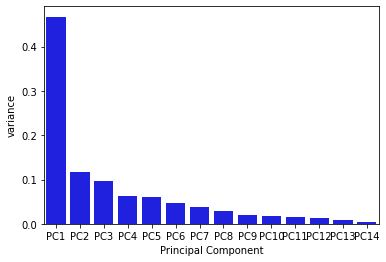

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

In [ ]:
# sklearn_pca = sklearnPCA(n_components=2)
# Y_sklearn = sklearn_pca.fit_transform(X)

# sklearn_pca.explained_variance_ratio_

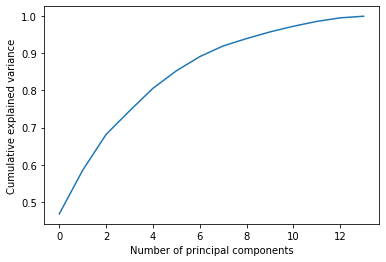

In [ ]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:

pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transform_df)
pca_2d = pca_2.transform(X)

# ii) SVD: 

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df_svd = df.copy()

In [ ]:
df_svd.shape

(506, 14)

In [ ]:
df_svd.head()

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
encoder = LabelEncoder()

In [ ]:

for col in df_svd.columns:
    df_svd[col] = encoder.fit_transform(df_svd[col])

In [ ]:
df_svd.head()


,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0,3,19,0,51,320,172,297,0,34,9,356,53,137
1,23,0,56,0,36,279,225,333,1,11,23,356,161,113
2,22,0,56,0,36,400,159,333,1,11,23,271,28,196
3,32,0,16,0,33,383,112,361,2,5,31,311,6,193
4,110,0,16,0,33,395,139,361,2,5,31,356,64,203


In [ ]:
X = df_svd
y = df_svd.MedValue

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
u, s, v = np.linalg.svd(X, full_matrices=True)

In [ ]:
u.shape

(506, 506)

In [ ]:

s.shape

(14,)

In [ ]:
v.shape

(14, 14)

Text(0, 0.5, 'Percent of the variance explained')

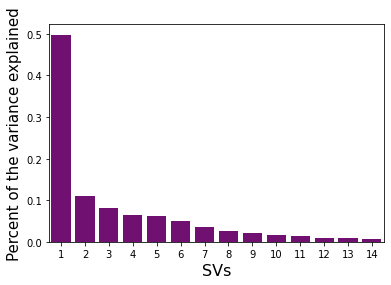

In [ ]:

variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="purple")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:

col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2],index=df_svd["RAD"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'RAD'}, inplace=True)
svd_df.head()

,RAD,SV1,SV2
0,0,-0.052991,-0.003826
1,1,-0.035194,0.032386
2,1,-0.051674,-0.018698
3,2,-0.065279,-0.004669
4,2,-0.060773,-0.005779


Text(0, 0.5, 'SV 2: 11.1%')

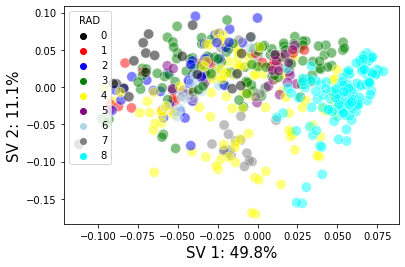

In [ ]:
color_dict = dict({0:'Black',
                   1: 'Red',2:'Blue',3:'Green',4:'Yellow',5:'Purple',6:'Lightblue',7:'Grey',8:'Cyan'})
sns.scatterplot(x="SV1", y="SV2", hue="RAD", 
                palette=color_dict, 
                data=svd_df, s=105,alpha=0.5)
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

# t-SNE

With t-sne, we get better visualization. It is also a technique to reduce the dimensionality. It retains a lot of the original information.

In [ ]:
#Importing required libraries for t-sne
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [ ]:
df_tsne = df.copy()

In [ ]:
df_tsne.head(3)

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [ ]:
sc = StandardScaler()
pca = PCA()
tsne = TSNE()
tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])
X_tsne = tsne_after_pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


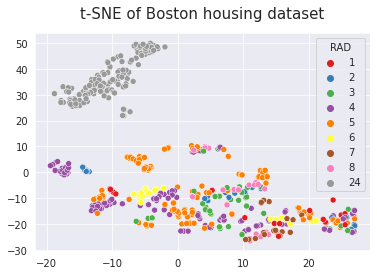

In [ ]:
sns.set_style('darkgrid')

X = df_tsne
y = df_tsne.RAD

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of Boston housing dataset", fontsize=15, pad=15)
plt.savefig('t-SNE.png')

# Isometric mapping (Isomap)

In [ ]:
#Importing required libraries
from sklearn.manifold import Isomap

In [ ]:
df_iso = df.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


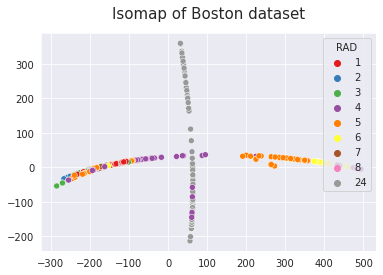

In [ ]:
sns.set_style('darkgrid')

X = df_iso
y = df_iso.RAD

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap of Boston dataset", fontsize=15, pad=15)
plt.savefig('Isomap.png')

# iv) LLE :

In [ ]:
# Visualization
import plotly.express as px # for data visualization

# Skleran
from sklearn.datasets import make_swiss_roll # for creating swiss roll
# from sklearn.manifold import LocallyLinearEmbedding as LLE
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
#This import is needed to silence pyflakes


# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression

In [ ]:
df_lle =df.copy()
df_lle.head(3)

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [ ]:

X = df_lle
y=df_lle.MedValue



In [ ]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')

In [ ]:
out = model.fit_transform(X)


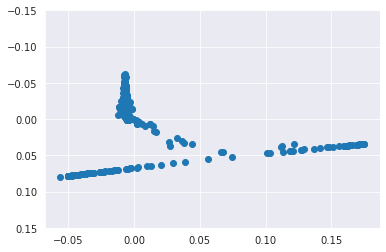

In [ ]:
fig, ax = plt.subplots()

ax.scatter(out[:, 0], out[:, 1])
ax.set_ylim(0.15, -0.15);

# UMAP

UMP stands for - Uniform Manifold Approximation and Projection 

It is a general purpose manifold learning and dimension reduction algorithm.

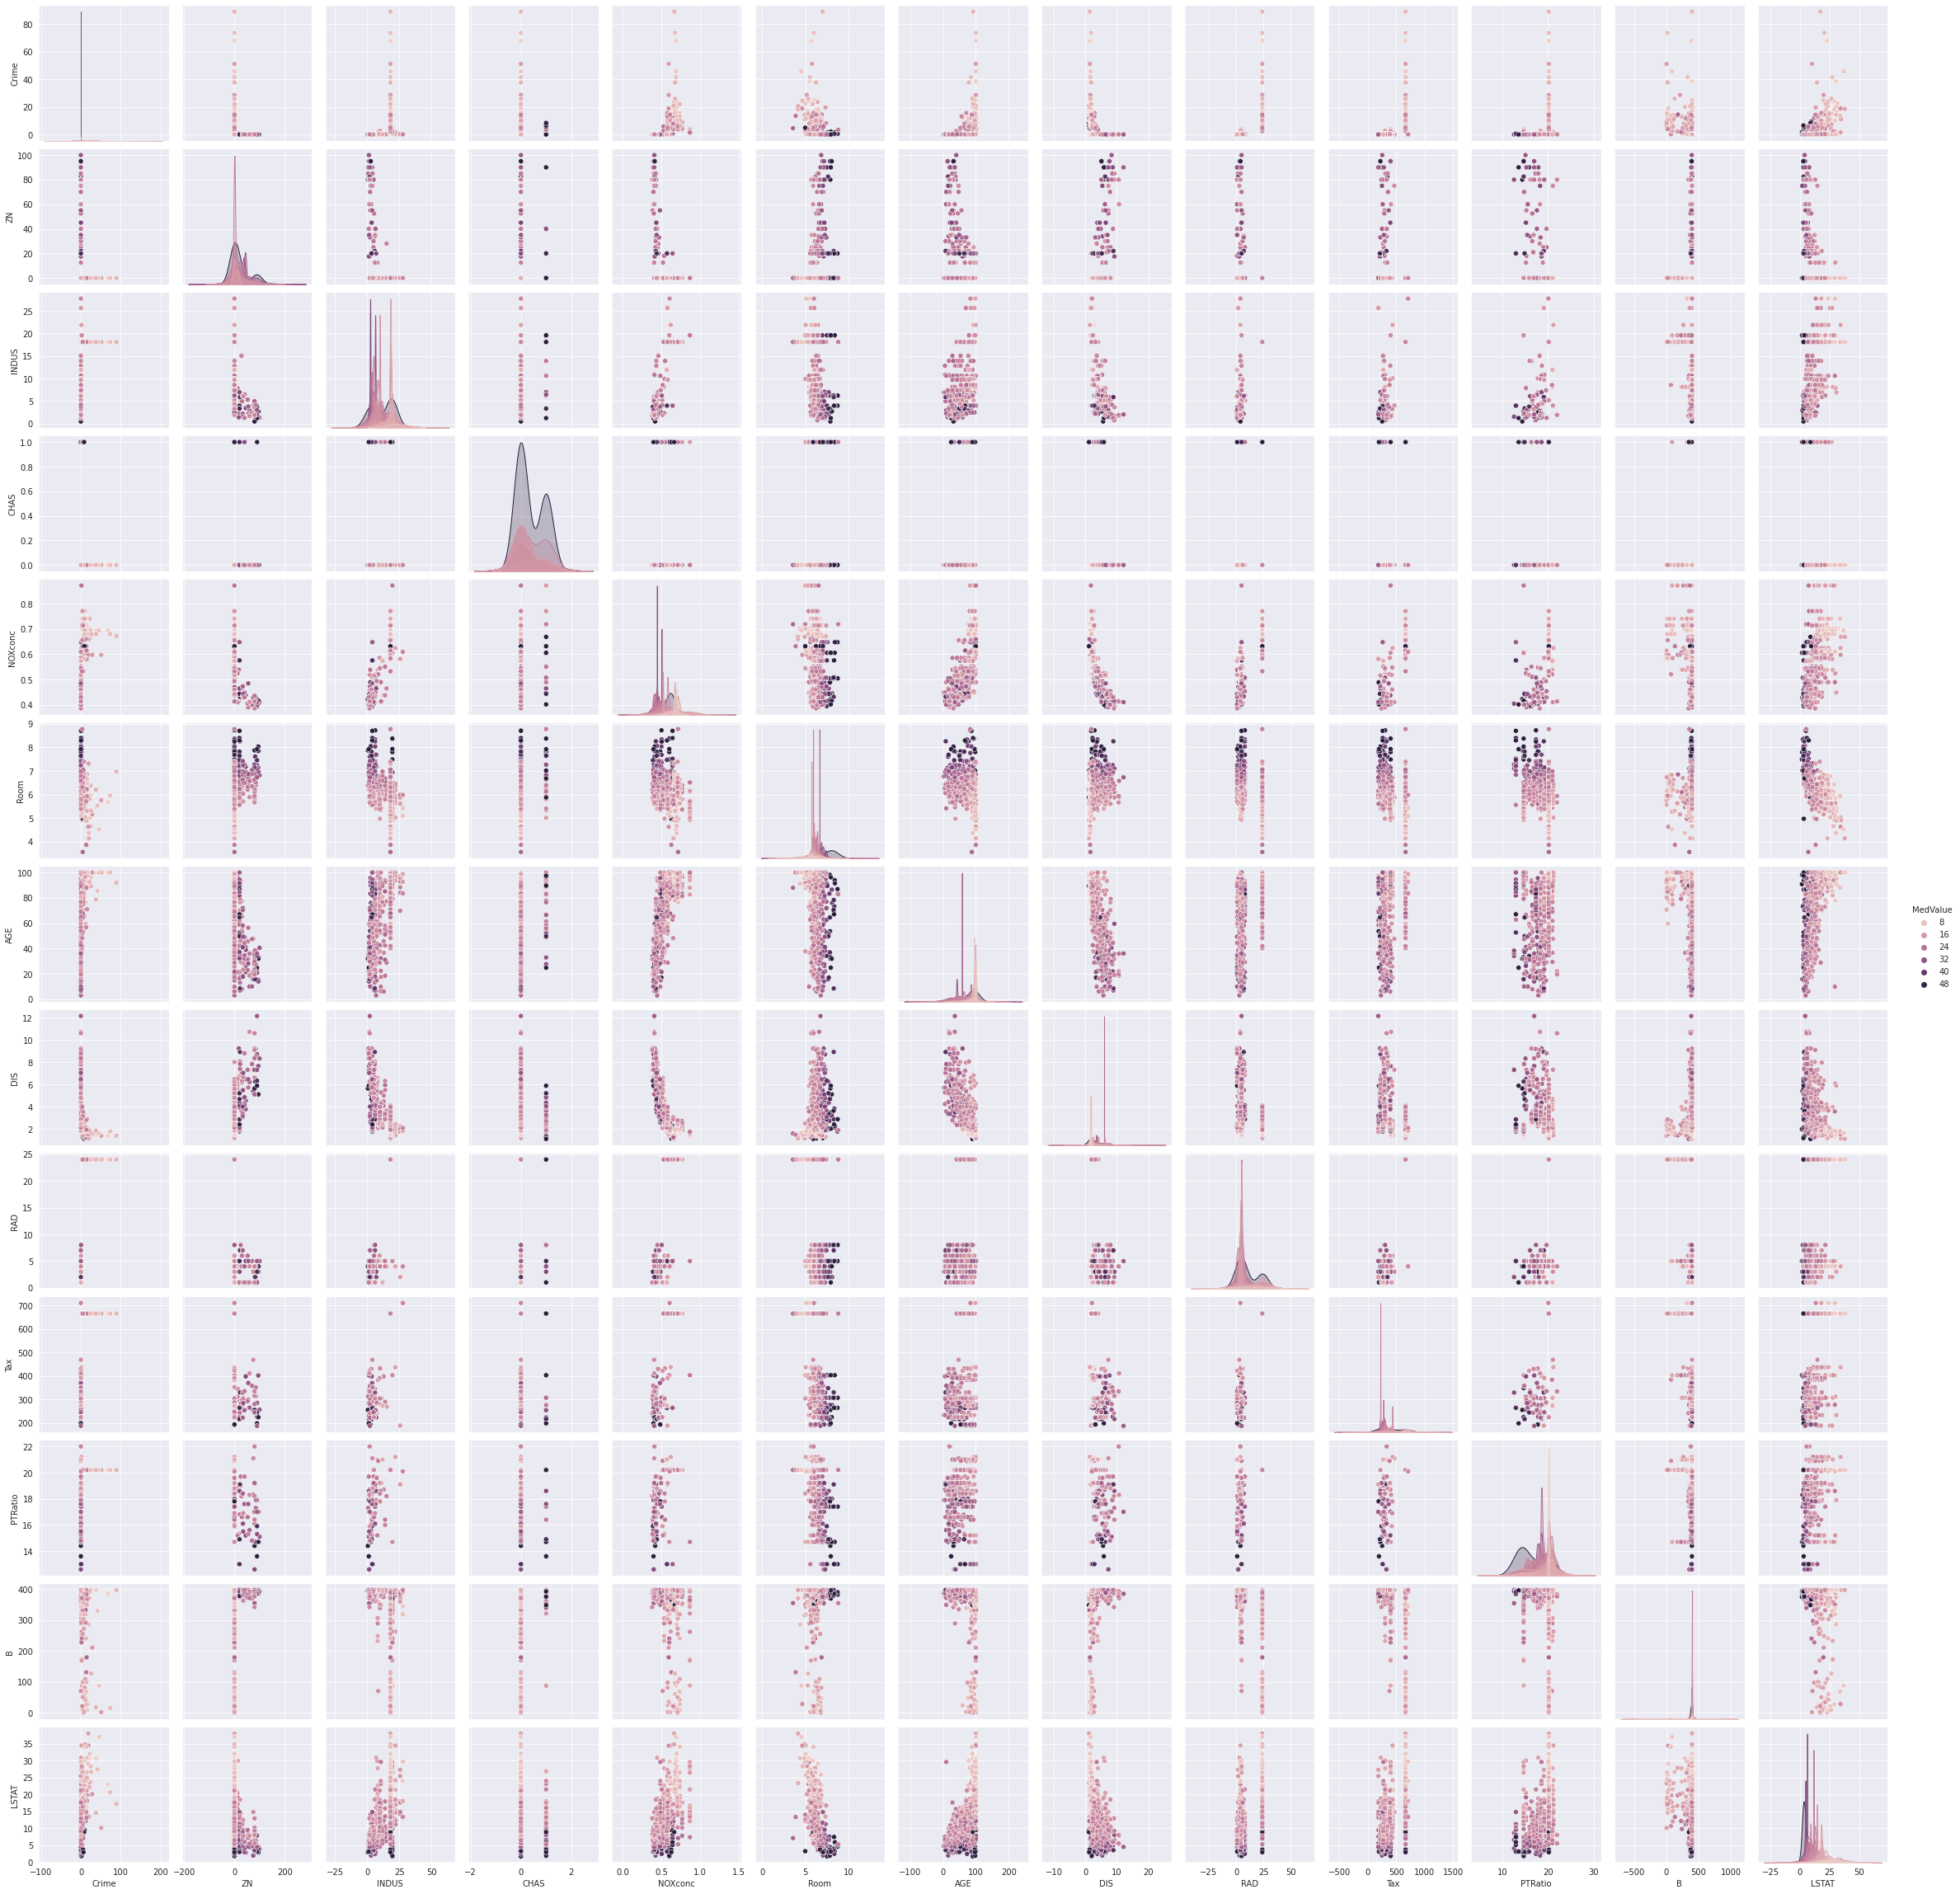

In [ ]:
sns.pairplot(df_lle, hue='MedValue')

In [ ]:
!pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=33b4f5ecd355a52f2467c11c412af232308095dac23184d564a98798b31d9ea2
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap


In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 37.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=4f0a98a980f6ecc0b557e3167da3a5b69567908a9e39360d9f5b6f83cc4f20b0
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=0a550f9e589a3c3d1c839e215f3f13e745aa263e16930ebf44b75fd6b6d441ef
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
reducer = umap.UMAP()


In [ ]:
df_umap =df.copy()
df_umap.head()

,Crime,ZN,INDUS,CHAS,NOXconc,Room,AGE,DIS,RAD,Tax,PTRatio,B,LSTAT,MedValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X_umap = df_umap
scaled_data = StandardScaler().fit_transform(X_umap)


In [ ]:

embedding = reducer.fit_transform(scaled_data)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



(506, 2)

Text(0.5, 1.0, 'UMAP projection of the Boston Housing dataset')

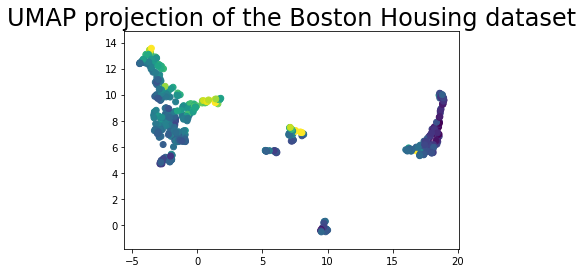

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1], c=X_umap.MedValue)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Boston Housing dataset', fontsize=24)

 References: 

 1.  https://towardsdatascience.com/lle-locally-linear-embedding-a-nifty-way-to-reduce-dimensionality-in-python-ab5c38336107
 2. For umap using this tutorial: https://umap-learn.readthedocs.io/en/latest/basic_usage.html
 3. https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/
